In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pylab as plt 
import matplotlib.font_manager as fm

In [6]:
float_pop = pd.read_csv('/content/sample_data/전국 지역별 이동반경거리지수.csv', encoding = 'cp949')
float_pop   
# 20년 12월 초부터 22년 7월 초까지 일주일동안 수집된 것을 주간격으로 확인할 수 있었다

,dt,home_loc_nm,age_cd,sex_cd,h0_mov_dist,h1_mov_dist,h0_max_h_dist,h1_max_h_dist
0,2020-12-07,충청북도,\N,\N,23263,8583,10646,5106
1,2020-12-07,충청남도,\N,\N,24508,9787,11238,5913
2,2020-12-07,제주특별자치도,\N,\N,28146,10754,17324,7852
3,2020-12-07,전라북도,\N,\N,24103,9388,10939,5280
4,2020-12-07,전라남도,\N,\N,25819,10723,12444,6251
...,...,...,...,...,...,...,...,...
2319,2022-07-04,\N,30,\N,25944,12664,12964,7819
2320,2022-07-04,\N,40,\N,28870,12856,13224,7365
2321,2022-07-04,\N,50,\N,30580,13708,13752,7400
2322,2022-07-04,\N,60,\N,25699,11445,11799,6031


In [7]:
float_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dt             2324 non-null   object
 1   home_loc_nm    2324 non-null   object
 2   age_cd         2324 non-null   object
 3   sex_cd         2324 non-null   object
 4   h0_mov_dist    2324 non-null   int64 
 5   h1_mov_dist    2324 non-null   int64 
 6   h0_max_h_dist  2324 non-null   int64 
 7   h1_max_h_dist  2324 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 145.4+ KB


In [8]:
# 누락값 확인 결과 해당없음
float_pop.isnull().sum()

dt               0
home_loc_nm      0
age_cd           0
sex_cd           0
h0_mov_dist      0
h1_mov_dist      0
h0_max_h_dist    0
h1_max_h_dist    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_

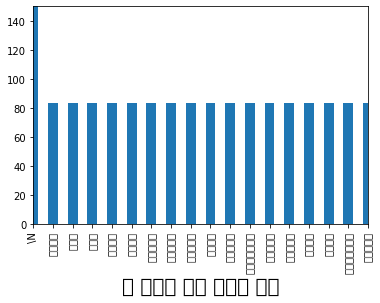

In [9]:
x = np.arange(8)
loc =  float_pop["home_loc_nm"]
loc.value_counts(sort=True).plot(kind="bar")

plt.xlabel('각 지역별 주간 데이터 개수', size = 20)
plt.xlim([0,17])     
plt.ylim([0,150])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

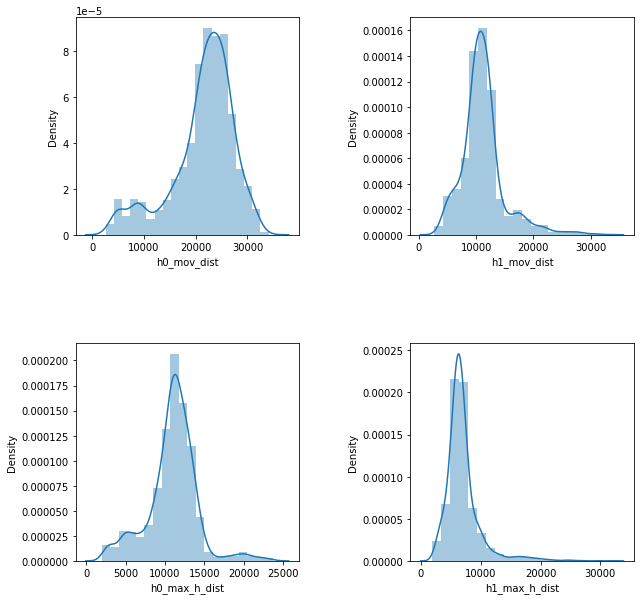

In [10]:
# EDA - 전국 이동반경 거리지수 시각화
plt.figure(1 , figsize = (10 , 10))
n = 0 
for x in ['h0_mov_dist' , 'h1_mov_dist' , 'h0_max_h_dist', 'h1_max_h_dist']:
    n += 1
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(float_pop[x] , bins = 20)
plt.show()

In [11]:
float_pop.index

RangeIndex(start=0, stop=2324, step=1)

In [12]:
# 날짜를 datetime 형태로 변환
float_pop['dt'] = pd.to_datetime(float_pop['dt'])
float_pop.set_index('dt', inplace = True)

In [13]:
# 예: 서울인구만 보기위해 지역선택
seoul = float_pop[float_pop['home_loc_nm'] == '서울특별시']
seoul

,home_loc_nm,age_cd,sex_cd,h0_mov_dist,h1_mov_dist,h0_max_h_dist,h1_max_h_dist
dt,,,,,,,
2020-12-07,서울특별시,\N,\N,18651,6818,9571,4452
2020-12-14,서울특별시,\N,\N,17414,6305,9118,4048
2020-12-21,서울특별시,\N,\N,14639,9399,7718,6779
2020-12-28,서울특별시,\N,\N,14401,9229,8120,7018
2021-01-04,서울특별시,\N,\N,15721,5319,8318,3303
...,...,...,...,...,...,...,...
2022-06-06,서울특별시,\N,\N,17385,14568,9166,9229
2022-06-13,서울특별시,\N,\N,21843,9922,11494,6167
2022-06-20,서울특별시,\N,\N,21816,9686,11644,6097


Text(0.5, 1.0, '서울의 평일/휴일 이동반경 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_

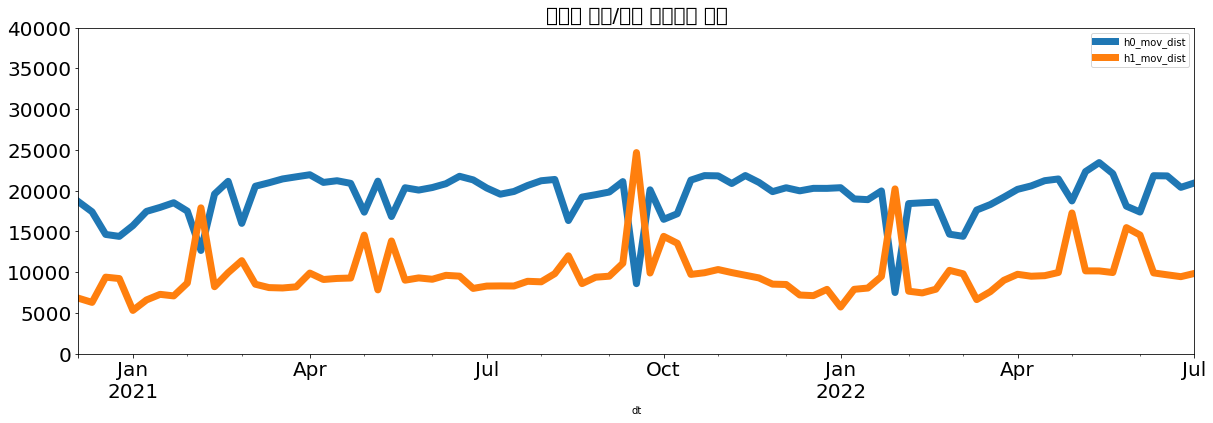

In [14]:
# EDA - 서울특별시의 주별 평일/주말 이동반경 비교
seoul[['h0_mov_dist', 'h1_mov_dist']].plot(kind='line', figsize=(20,6), linewidth=7, fontsize=20,
                               xlim=('2020-12-07', '2022-07'), ylim=(0,40000)) 
plt.title('서울의 평일/휴일 이동반경 비교',fontsize=20)

Text(0.5, 1.0, '서울의 평일/휴일 이동거리 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_

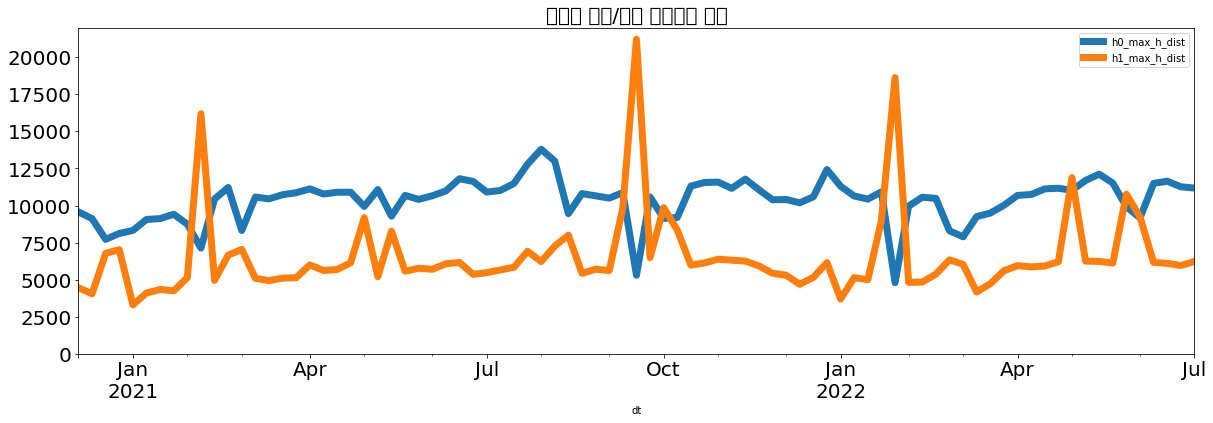

In [15]:
# EDA - 서울의 평일/휴일 총 이동거리 비교
seoul[['h0_max_h_dist', 'h1_max_h_dist']].plot(kind='line', figsize=(20,6), linewidth=7, fontsize=20,
                               xlim=('2020-12-07', '2022-07'), ylim=(0,22000)) 
plt.title('서울의 평일/휴일 이동거리 비교',fontsize=20)

In [21]:
# 시계열 분해: 이동평균(계절성 제거)
plt.rcParams['figure.figsize'] = (15,10)
seoul_rslt = sm.tsa.seasonal_decompose(seoul['h0_mov_dist'], model='multiplicative').plot()
plt.show()

ValueError: ignored